# Examen Módulo 2 - Montecarlo.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

---
### Simulación Montecarlo usando Caminata aleatoria<font size='1'>(3.3 puntos)</font>

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A**, **B** y **C**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 2 de cada 3 operaciones cambia al estado **B**, el resto de casos cambia al estado **C**.
* Estando en el estado **B**, 3 de cada 5 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **B**.
* Estando en el estado **C**, 4 de cada 5 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **C**.
Respresentado por el siguiente diagrama

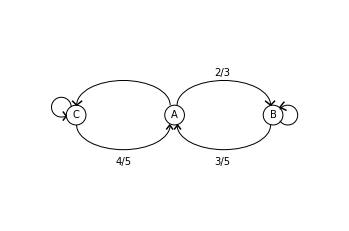

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

A = patches.Circle((0, 0), 0.1,fc='None',color='k')
B = patches.Circle((1, 0), 0.1,fc='None',color='k')
C = patches.Circle((-1,0), 0.1,fc='None',color='k')
AB = patches.Arc((0.5,   0.1 ), 0.95, 0.5,theta2=180,fc='None',color='k')
BA = patches.Arc((0.5,   -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
AC = patches.Arc((-0.52, 0.1 ), 0.95, 0.5,theta2=180,fc='None',color='k')
CA = patches.Arc((-0.52, -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
CC = patches.Arc((-1.15, 0.08), 0.2,  0.2,theta2=290,fc='None',color='k')
BB = patches.Arc((1.15,  0   ), 0.2,  0.2,theta1=-145,theta2=145,fc='None',color='k')
ax = plt.gca()
ax.add_artist(A)
ax.add_artist(B)
ax.add_artist(C)
ax.add_artist(AB)
ax.add_artist(BA)
ax.add_artist(AC)
ax.add_artist(CA)
ax.add_artist(BB)
ax.add_artist(CC)

plt.plot([0.925,0.975,1.015],[0.14,0.1,0.14],'k')    # AB
plt.plot([0.06,0.03,0],[-0.14,-0.1,-0.14],'k')       # BA
plt.plot([-0.945,-0.995,-1.035],[0.14,0.1,0.14],'k') # AC
plt.plot([-0.02,-0.05,-0.08],[-0.14,-0.1,-0.14],'k') # CA
plt.plot([1.13,1.07,1.11],[0.05,0.08,0.13],'k')      # BB
plt.plot([-1.13,-1.1,-1.13],[0.03,-0.01,-0.05],'k')  # CC

plt.text(-0.04,-0.02,'A')
plt.text(0.97,-0.02,'B')
plt.text(-1.04,-0.02,'C')
plt.text(0.4,0.4,'2/3')  # AB
plt.text(0.4,-0.5,'3/5') # BA
plt.text(-0.6,-0.5,'4/5') # CA

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

1. Defina una función que permita simular el proceso antes descrito.

Si suponemos que el proceso inicia en el estado A

In [16]:
def cambiar_posicion():
    Posicion = ['A']
    OperacionesA = ['B','B','C']
    OperacionesB = ['B','B','A','A','A']
    OperacionesC = ['A','A','A','A','C']
    N_Operaciones = 100
    for i in range (N_Operaciones):
        if Posicion[-1] == 'A':
            Posicion.append(np.random.choice(OperacionesA))
        elif Posicion[-1] == 'B': 
            Posicion.append(np.random.choice(OperacionesB))
        elif Posicion[-1] == 'C': 
            Posicion.append(np.random.choice(OperacionesC))
    Posicion_final = 'La posición final es ' + Posicion[-1]
    return Posicion_final,len(Posicion)

cambiar_posicion()   

('La posición final es A', 101)

2. Si el proceso parte del estado **A**, y se ejecutan 100 operaciones. Usando el método Montecarlo con 1000 escenarios, ¿Cuál es la probabilidad de que el proceso finalice en el estado **B**?.

In [140]:
def cambiar_posicionM():
    Posicion = 'A'
    OperacionesA = ['B','B','C']
    OperacionesB = ['B','B','A','A','A']
    OperacionesC = ['A','A','A','A','C']
    N_Operaciones = 100
    for i in range (N_Operaciones):
        if Posicion == 'A':
            Posicion = (np.random.choice(OperacionesA))
        elif Posicion == 'B': 
            Posicion = (np.random.choice(OperacionesB))
        elif Posicion == 'C': 
            Posicion = (np.random.choice(OperacionesC))
    Posicion_final = 'La posición final es ' + Posicion
    return Posicion

cambiar_posicionM()   

'C'

In [141]:
Procesos = []
for i in range (10**3):
    Procesos.append(cambiar_posicionM())
Procesos.count('A'),Procesos.count('B'),Procesos.count('C')

(394, 430, 176)

In [142]:
Probabilidad_A = ((Procesos.count('A')) / 10**3)*100
Probabilidad_B = ((Procesos.count('B')) / 10**3)*100
Probabilidad_C = ((Procesos.count('C')) / 10**3)*100

In [149]:
P_B = 'La probabilidad de que el proceso termine en B es del ' + str(Probabilidad_B) + ' %'
P_B

'La probabilidad de que el proceso termine en B es del 43.0 %'

**Extra: Probabilidades de A y C**

In [148]:
P_A = 'La probabilidad de que el proceso termine en A es del ' + str(Probabilidad_A) + ' %'
P_C = 'La probabilidad de que el proceso termine en C es del ' + str(Probabilidad_C) + ' %'
P_A,P_C

('La probabilidad de que el proceso termine en A es del 39.4 %',
 'La probabilidad de que el proceso termine en C es del 17.599999999999998 %')

---
### Integración Montecarlo tipo 2 <font size='1'>(3.3 puntos)</font>
Encuentre el área de la región que cumpla
$$
e^{-0.05(x^2+y^2)}\sin(x^2+y^2)>0.5\;\,.
$$

1. Escriba la función que discrimine los puntos que satisfacen la restricción de la región a evaluar, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

---
### Probabilidad Precio-Umbral <font size='1'>(3.4 puntos)</font>

Suponga que desea invertir en **Spotify** o **Mercado Libre**. Evalúe la probabilidad de obtener un retorno del 10% en seis meses a partr del 23 de junio del presente año.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *pandas-datareader*. Donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.

In [154]:
import pandas_datareader.data as web
from datetime import date

In [152]:
def getClose(names, start, end):
    return web.DataReader(names,'yahoo',start,end)

2. Obtenga los precios de cierre ajustados para Spotify y Mercado Libre desde el 22 de junio de 2020 al 22 de junio de 2022.

In [153]:
names = ['SPOT','MELI'] # Spotify, Mercado libre
start = '2020-06-22'
end = '2022-06-22'
data = getClose(names,start,end)['Adj Close']
data.head() # Mostrar los primeros datos

Symbols,SPOT,MELI
Date,,
2020-06-22,236.059998,984.539978
2020-06-23,241.759995,977.489990
2020-06-24,242.860001,953.770020
2020-06-25,267.470001,971.440002
2020-06-26,264.950012,973.169983


3. Calcule el rendimiento simple para ambas empresas.

4. Escriba una función que, dando como argumentos:
* la media,
* la desviación estandar,
* la fecha de inicio,
* la fecha del fin de simulación y
* número de escenarios a simular;

regrese en un _DataFrame_ de _pandas_ cuyo índice sea el rango de fechas dadas como argumentos.

In [155]:
def sim(me,std,inicio,fin,N):
    fechas = pd.date_range(inicio,fin)
    R = np.random.normal(me,std,(fechas,N))
    return pd.DataFrame(data = R,index = fechas)

In [ ]:
SPOT_R = sim(R['SPOT'].mean(),
            R['SPOT'].std(),
             start, # Fecha de inicio
            end,  # Días a simular
            100000) # Escenarios
MELI_R = sim(R['MELI'].mean(),
            R['MELI'].std(),
             start,
            end,
            100000)

5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 23 de junio de 2022 al 23 de diciembre de 2022.

6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10% en seis meses a partir del 23 de junio de 2022. ¿Cuál genera mayores espectativas?